# Leave One Out Cross-Validation and KNNs experiments

Install the required packages (run only once, when setting up on your PC)

In [150]:
#%pip install numpy
#%pip install matplotlib
#%pip install scikit-learn

Import packages

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from fastloocv import FastLOOCV

from sklearn.datasets import load_diabetes, load_wine


### Utils functions

Define a function that extract the best K.

In [152]:
def best_k_from_scores(k_values: list, scores: list) -> int:
    """
    Given a list of K values and their corresponding scores, return the K value with the best (lowest) score.
    Parameters
    ----------
    k_values : list
        List of integer K values.
    scores : list
        List of performance scores corresponding to each K value.
    Returns
    ------- 
    best_k : int
        The K value that achieved the best (lowest) score.
    """
    best_index = np.argmin(scores)
    return k_values[best_index]

Define a function to plot and visualize the LOOCV scores

In [153]:
def plot_loocv_results(k_values, scores_fast, scores_normal):
    """
    Plot the LOOCV results for fast and normal methods.

    Parameters
    ----------
    k_values : list
        List of integer K values.
    scores_fast : list
        List of performance scores from the fast LOOCV method.
    scores_normal : list
        List of performance scores from the normal LOOCV method.
    """
    plt.figure(figsize=(5, 5))
    plt.plot(k_values, scores_fast, 'o-', label='Fast LOOCV Score')
    plt.plot(k_values, scores_normal, 'x-.', label='Normal LOOCV Score')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.title('LOOCV Scores: Fast vs Normal')
    plt.legend()
    plt.grid(True)
    plt.xticks([5, 10, 15, 20])
    plt.show()

Define a function to plot and visualize the LOOCV elapsed time

In [154]:
def plot_loocv_elapsed_time(sample_sizes, elapsed_fast_list, elapsed_normal_list, x_points):
    """
    Plot the elapsed time for fast and normal LOOCV methods.

    Parameters
    ----------
    sample_sizes : list
        List of sample sizes used in the experiments.
    elapsed_fast_list : list
        List of elapsed times for the fast LOOCV method.
    elapsed_normal_list : list
        List of elapsed times for the normal LOOCV method.
    """
    plt.figure(figsize=(5, 5))
    plt.plot(sample_sizes, elapsed_fast_list, 'o-', label='Fast LOOCV Score')
    plt.plot(sample_sizes, elapsed_normal_list, 's-', label='Normal LOOCV Score')
    plt.xlabel('Sample Size')
    plt.ylabel('Elapsed Time (seconds)')
    plt.title('Computation Time: Fast vs Normal LOOCV')
    plt.legend()
    plt.grid(True)
    plt.xticks(x_points)
    plt.show()

### Dataset Declaration

We will use the same datasets mentioned in the reference paper, available in scikit-learn: `Diabetes` and `Wine`.

In [155]:
from sklearn.discriminant_analysis import StandardScaler


X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_wine, y_wine = load_wine(return_X_y=True)

scaler = StandardScaler()

X_diabetes_scaled = scaler.fit_transform(X_diabetes)
X_wine_scaled = scaler.fit_transform(X_wine)

data_diabetes = np.hstack([X_diabetes_scaled, y_diabetes.reshape(-1, 1)])
data_wine = np.hstack([X_wine_scaled, y_wine.reshape(-1, 1)])

print("Diabetes data shape:", data_diabetes.shape)
print("Wine data shape:", data_wine.shape)

Diabetes data shape: (442, 11)
Wine data shape: (178, 14)


### Diabetes experiment

In [156]:
k_values = [k for k in range(1, 21)]
loocv_diabetes = FastLOOCV(data_diabetes)

scores_fast, _ = loocv_diabetes.do_fast_loocv(k_values)
scores_normal, _ = loocv_diabetes.do_normal_loocv(k_values)


Best K (fast): 18
Best K (normal): 18


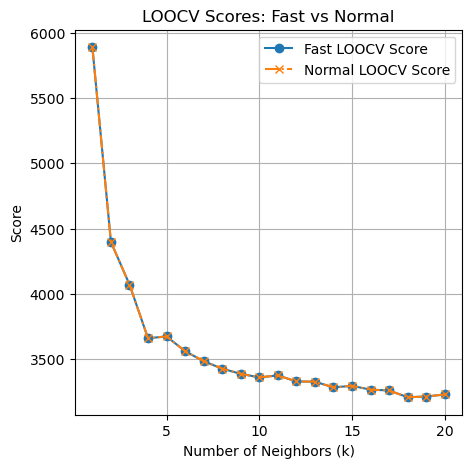

In [157]:
print("Best K (fast):", best_k_from_scores(k_values, scores_fast))
print("Best K (normal):", best_k_from_scores(k_values, scores_normal))

plot_loocv_results(k_values, scores_fast, scores_normal)

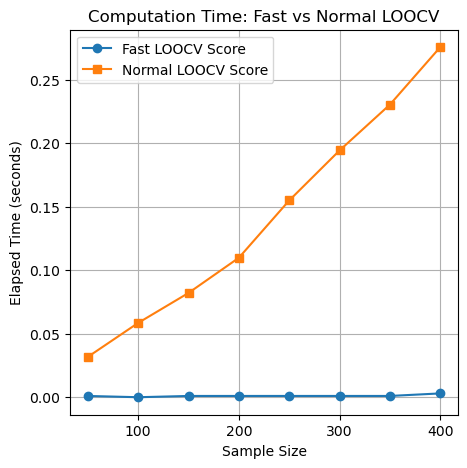

In [158]:
elapsed_normal_list, elapsed_fast_list = [], []
sample_sizes = [50, 100, 150, 200, 250, 300, 350, 400]

for sample_size in sample_sizes:
    _, elapsed_normal = loocv_diabetes.do_normal_loocv([5], sample_size=sample_size)
    _, elapsed_fast = loocv_diabetes.do_fast_loocv([5], sample_size=sample_size)
    
    elapsed_normal_list.append(elapsed_normal)
    elapsed_fast_list.append(elapsed_fast)

plot_loocv_elapsed_time(sample_sizes, elapsed_fast_list, elapsed_normal_list, [100, 200, 300, 400])


### Wine experiment

In [159]:
k_values = [k for k in range(1, 26)]
loocv_wine = FastLOOCV(data_wine)

scores_fast, _ = loocv_wine.do_fast_loocv(k_values)
scores_normal, _ = loocv_wine.do_normal_loocv(k_values)


Best k (Fast LOOCV): 11
Best k (Normal LOOCV): 11


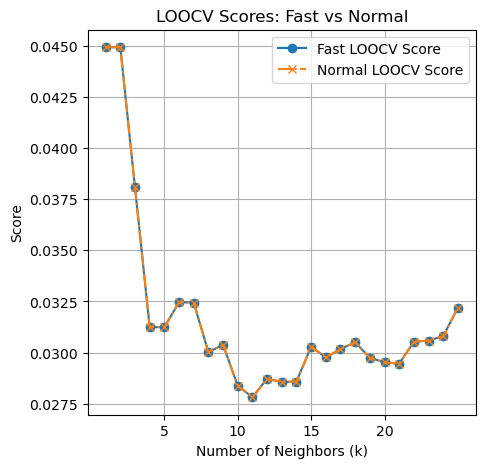

In [160]:
print("Best k (Fast LOOCV):", best_k_from_scores(k_values, scores_fast))
print("Best k (Normal LOOCV):", best_k_from_scores(k_values, scores_normal))

plot_loocv_results(k_values, scores_fast, scores_normal)

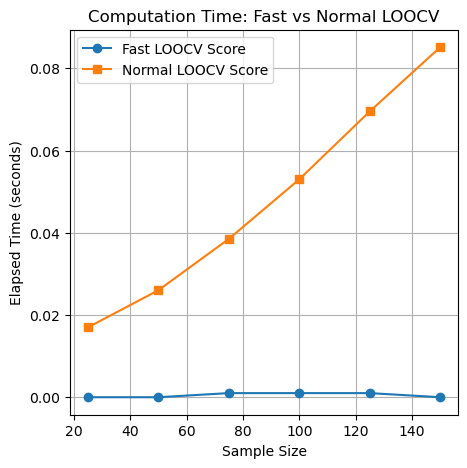

In [161]:
elapsed_normal_list, elapsed_fast_list = [], []
sample_sizes = [sample_size for sample_size in range(25, 151, 25)]

for sample_size in sample_sizes:
    _, elapsed_normal = loocv_diabetes.do_normal_loocv([5], sample_size=sample_size)
    _, elapsed_fast = loocv_diabetes.do_fast_loocv([5], sample_size=sample_size)
    
    elapsed_normal_list.append(elapsed_normal)
    elapsed_fast_list.append(elapsed_fast)

plot_loocv_elapsed_time(sample_sizes, elapsed_fast_list, elapsed_normal_list, [sample_size for sample_size in range(20, 160, 20)])


### Tie-breaking Condition experiment
We reuse the `Diabetes` and `Wine` datesets, but with only one input feature, BMI and malic-acid respectively.

In [162]:
X_diabetes_bmi = X_diabetes_scaled[:, [2]]
data_diabetes_bmi = np.hstack([X_diabetes_bmi, y_diabetes.reshape(-1, 1)])
print("Diabetes data shape:", data_diabetes_bmi.shape)

X_wine_malic = X_wine_scaled[:, [1]]
data_wine_malic = np.hstack([X_wine_malic, y_wine.reshape(-1, 1)])
print("\nWine data shape:", data_wine_malic.shape)


Diabetes data shape: (442, 2)

Wine data shape: (178, 2)


In [163]:
k_values = [k for k in range(1, 21)]
loocv_wine = FastLOOCV(data_diabetes_bmi)

scores_fast, _ = loocv_wine.do_fast_loocv(k_values)
scores_normal, _ = loocv_wine.do_normal_loocv(k_values)


Best k (Fast LOOCV): 17
Best k (Normal LOOCV): 17


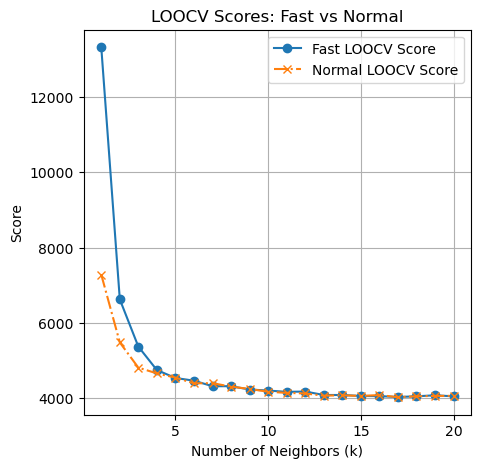

In [164]:
print("Best k (Fast LOOCV):", best_k_from_scores(k_values, scores_fast))
print("Best k (Normal LOOCV):", best_k_from_scores(k_values, scores_normal))

plot_loocv_results(k_values, scores_fast, scores_normal)

In [165]:
k_values = [k for k in range(1, 26)]
loocv_wine = FastLOOCV(data_wine_malic)

scores_fast, _ = loocv_wine.do_fast_loocv(k_values)
scores_normal, _ = loocv_wine.do_normal_loocv(k_values)

Best k (Fast LOOCV): 17
Best k (Normal LOOCV): 21


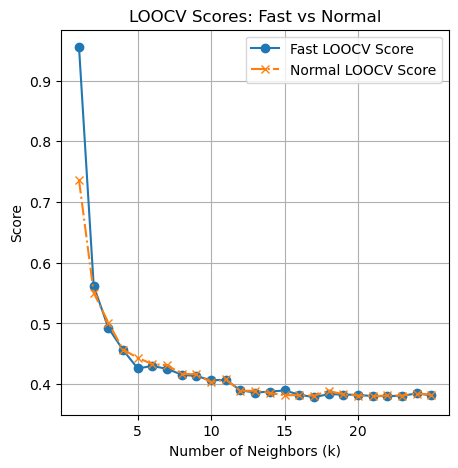

In [166]:
print("Best k (Fast LOOCV):", best_k_from_scores(k_values, scores_fast))
print("Best k (Normal LOOCV):", best_k_from_scores(k_values, scores_normal))

plot_loocv_results(k_values, scores_fast, scores_normal)